MMDetection 설치

In [ ]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
!pip install mmcv-full
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 47.1 MB 182 kB/s 
     |████████████████████████████████| 190 kB 6.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'mmdetection'...
remote: Enumerating objects: 24969, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 24969 (delta 3), reused 1 (delta 0), pack-reused 24959
Receiving objects: 100% (24969/24969), 37.76 MiB | 30.89 MiB/s, done.
Resolving deltas: 100% (17495/17495), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to

In [ ]:
from mmdet.apis import init_detector, inference_detector

BCCD Dataset를 Download

In [ ]:
!git clone https://github.com/Shenggan/BCCD_Dataset

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 7.39 MiB | 25.38 MiB/s, done.
Resolving deltas: 100% (378/378), done.


In [ ]:
import os

with open("/content/BCCD_Dataset/BCCD/label.txt","w") as f:
  f.write("RBC\n")
  f.write("WBC\n")
  f.write("Platelets")

!cat /content/BCCD_Dataset/BCCD/label.txt

RBC
WBC
Platelets

VOC를 COCO로 변환하는 package적용하기

In [ ]:
!git clone https://github.com/yukkyo/voc2coco.git

Cloning into 'voc2coco'...
remote: Enumerating objects: 436, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 436 (delta 11), reused 19 (delta 6), pack-reused 409
Receiving objects: 100% (436/436), 216.32 KiB | 9.83 MiB/s, done.
Resolving deltas: 100% (387/387), done.


In [ ]:
%cd /content/voc2coco
# 학습/검증/테스트 용 json annotation을 생성. 

!python voc2coco.py \
    --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
    --ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/train.txt \
    --labels /content/BCCD_Dataset/BCCD/label.txt \
    --output /content/BCCD_Dataset/BCCD/train.json \
    --ext xml

!python voc2coco.py \
    --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
    --ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/val.txt \
    --labels /content/BCCD_Dataset/BCCD/label.txt \
    --output /content/BCCD_Dataset/BCCD/val.json \
    --ext xml

!python voc2coco.py \
    --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
    --ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/test.txt \
    --labels /content/BCCD_Dataset/BCCD/label.txt \
    --output /content/BCCD_Dataset/BCCD/test.json \
    --ext xml

/content/voc2coco
Start converting !
100% 205/205 [00:00<00:00, 4650.38it/s]
Start converting !
100% 87/87 [00:00<00:00, 5873.81it/s]
Start converting !
100% 72/72 [00:00<00:00, 4752.98it/s]


In [ ]:
!cat /content/BCCD_Dataset/BCCD/train.json

{"images": [{"file_name": "BloodImage_00001.jpg", "height": 480, "width": 640, "id": "BloodImage_00001"}, {"file_name": "BloodImage_00003.jpg", "height": 480, "width": 640, "id": "BloodImage_00003"}, {"file_name": "BloodImage_00004.jpg", "height": 480, "width": 640, "id": "BloodImage_00004"}, {"file_name": "BloodImage_00005.jpg", "height": 480, "width": 640, "id": "BloodImage_00005"}, {"file_name": "BloodImage_00006.jpg", "height": 480, "width": 640, "id": "BloodImage_00006"}, {"file_name": "BloodImage_00008.jpg", "height": 480, "width": 640, "id": "BloodImage_00008"}, {"file_name": "BloodImage_00009.jpg", "height": 480, "width": 640, "id": "BloodImage_00009"}, {"file_name": "BloodImage_00010.jpg", "height": 480, "width": 640, "id": "BloodImage_00010"}, {"file_name": "BloodImage_00012.jpg", "height": 480, "width": 640, "id": "BloodImage_00012"}, {"file_name": "BloodImage_00013.jpg", "height": 480, "width": 640, "id": "BloodImage_00013"}, {"file_name": "BloodImage_00020.jpg", "height": 

In [ ]:
!sudo apt-get install jq
!jq . /content/BCCD_Dataset/BCCD/train.json > output.json

In [ ]:
!head -100 output.json

{
  "images": [
    {
      "file_name": "BloodImage_00001.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00001"
    },
    {
      "file_name": "BloodImage_00003.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00003"
    },
    {
      "file_name": "BloodImage_00004.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00004"
    },
    {
      "file_name": "BloodImage_00005.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00005"
    },
    {
      "file_name": "BloodImage_00006.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00006"
    },
    {
      "file_name": "BloodImage_00008.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00008"
    },
    {
      "file_name": "BloodImage_00009.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00009"
    },
    {
      "file_name": "BloodImage_00010.jpg",
      "height": 480,
      "width": 640

CocoDataset 클래스를 활용하여 BCCD Dataset을 로딩하기

In [ ]:
%cd /content

/content


In [ ]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True)
class BCCDDataset(CocoDataset):
  CLASSES=("RBC","WBC","Platelets")

Config 설정하고 Checkpoint 파일 다운로드 받기

In [ ]:
!mkdir ./mmdetection/pretrained_model
!wget -O /content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2022-06-22 08:59:55--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.72
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  11.9MB/s    in 13s     

2022-06-22 09:00:09 (12.2 MB/s) - ‘/content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [ ]:
!pwd

/content


In [ ]:
from mmcv import Config

config_file="/content/mmdetection/configs/faster_rcnn/faster_rcnn_r101_fpn_1x_coco.py"
cfg=Config.fromfile(config_file)

print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained',
                      checkpoint='torchvision://resnet101')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigm

In [ ]:
from mmdet.apis import set_random_seed

cfg.model.roi_head.bbox_head.num_classes=3

cfg.dataset_type = 'BCCDDataset'
cfg.data_root = '/content/BCCD_Dataset/BCCD'

cfg.data.train.type='BCCDDataset'
cfg.data.train.data_root='/content/BCCD_Dataset/BCCD'
cfg.data.train.ann_file="train.json"
cfg.data.train.img_prefix="JPEGImages"

cfg.data.val.type='BCCDDataset'
cfg.data.val.data_root='/content/BCCD_Dataset/BCCD'
cfg.data.val.ann_file="val.json"
cfg.data.val.img_prefix="JPEGImages"

cfg.data.test.type='BCCDDataset'
cfg.data.test.data_root='/content/BCCD_Dataset/BCCD'
cfg.data.test.ann_file="test.json"
cfg.data.test.img_prefix="JPEGImages"

cfg.evaluation.interval=5
cfg.evaluation.interval = 12

cfg.optimizer.lr=0.02/8


cfg.lr_config.policy='step'
cfg.lr_config.warmup=None

cfg.runner.max_epochs=5

cfg.log_config.interval=10

cfg.load_from = "/content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth"

cfg.work_dir='./tutorial_exps'

cfg.checkpoint_config.interval = 12

cfg.device='cuda'

cfg.evaluation.metric = 'bbox'

cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

Dataset을 만들고, 모델 학습 및 Inference 적용

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

datasets=[build_dataset(cfg.data.train)]

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
print(datasets[0])


BCCDDataset Train dataset with number of images 205, and instance counts: 
+----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+
| category | count | category | count | category      | count | category | count | category | count |
+----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+
|          |       |          |       |               |       |          |       |          |       |
| 0 [RBC]  | 2382  | 1 [WBC]  | 214   | 2 [Platelets] | 209   |          |       |          |       |
+----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+


In [ ]:
datasets[0].__dict__.keys()

dict_keys(['ann_file', 'data_root', 'img_prefix', 'seg_prefix', 'proposal_file', 'test_mode', 'filter_empty_gt', 'file_client', 'CLASSES', 'coco', 'cat_ids', 'cat2label', 'img_ids', 'data_infos', 'proposals', 'flag', 'pipeline'])

In [ ]:
datasets[0].data_infos

[{'file_name': 'BloodImage_00001.jpg',
  'filename': 'BloodImage_00001.jpg',
  'height': 480,
  'id': 'BloodImage_00001',
  'width': 640},
 {'file_name': 'BloodImage_00003.jpg',
  'filename': 'BloodImage_00003.jpg',
  'height': 480,
  'id': 'BloodImage_00003',
  'width': 640},
 {'file_name': 'BloodImage_00004.jpg',
  'filename': 'BloodImage_00004.jpg',
  'height': 480,
  'id': 'BloodImage_00004',
  'width': 640},
 {'file_name': 'BloodImage_00005.jpg',
  'filename': 'BloodImage_00005.jpg',
  'height': 480,
  'id': 'BloodImage_00005',
  'width': 640},
 {'file_name': 'BloodImage_00006.jpg',
  'filename': 'BloodImage_00006.jpg',
  'height': 480,
  'id': 'BloodImage_00006',
  'width': 640},
 {'file_name': 'BloodImage_00008.jpg',
  'filename': 'BloodImage_00008.jpg',
  'height': 480,
  'id': 'BloodImage_00008',
  'width': 640},
 {'file_name': 'BloodImage_00009.jpg',
  'filename': 'BloodImage_00009.jpg',
  'height': 480,
  'id': 'BloodImage_00009',
  'width': 640},
 {'file_name': 'BloodImage_

In [ ]:
datasets[0].pipeline

Compose(
    LoadImageFromFile(to_float32=False, color_type='color', channel_order='bgr', file_client_args={'backend': 'disk'})
    LoadAnnotations(with_bbox=True, with_label=True, with_mask=False, with_seg=False, poly2mask=True, poly2mask={'backend': 'disk'})
    Resize(img_scale=[(1333, 800)], multiscale_mode=range, ratio_range=None, keep_ratio=True, bbox_clip_border=True)
    RandomFlip(flip_ratio=0.5)
    Normalize(mean=[123.675 116.28  103.53 ], std=[58.395 57.12  57.375], to_rgb=True)
    Pad(size=None, size_divisor=32, pad_to_square=False, pad_val={'img': 0, 'masks': 0, 'seg': 255})
    DefaultFormatBundle(img_to_float=True)
    Collect(keys=['img', 'gt_bboxes', 'gt_labels'], meta_keys=('filename', 'ori_filename', 'ori_shape', 'img_shape', 'pad_shape', 'scale_factor', 'flip', 'flip_direction', 'img_norm_cfg'))
)

In [ ]:
model=build_detector(cfg.model,train_cfg=cfg.get("train_cfg"),test_cfg=cfg.get("test_cfg"))
model.CLASSES=datasets[0].CLASSES

print(model.CLASSES)

('RBC', 'WBC', 'Platelets')


In [ ]:
import os, sys
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
!mkdir "/mydrive/pet_work_dir_3"

In [ ]:
import mmcv

mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))

In [ ]:
train_detector(model,datasets,cfg,distributed=False,validate=True)

2022-06-22 09:03:12,416 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-06-22 09:03:12,433 - mmdet - INFO - load checkpoint from local path: /content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2022-06-22 09:03:12,589 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([12, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current mod

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2022-06-22 09:03:19,460 - mmdet - INFO - Epoch [1][10/103]	lr: 2.500e-03, eta: 0:05:45, time: 0.684, data_time: 0.235, memory: 4737, loss_rpn_cls: 0.1062, loss_rpn_bbox: 0.0963, loss_cls: 0.7163, acc: 73.8770, loss_bbox: 0.8359, loss: 1.7548
2022-06-22 09:03:23,753 - mmdet - INFO - Epoch [1][20/103]	lr: 2.500e-03, eta: 0:04:35, time: 0.429, data_time: 0.011, memory: 4737, loss_rpn_cls: 0.0375, loss_rpn_bbox: 0.0742, loss_cls: 0.5135, acc: 81.8164, loss_bbox: 0.6576, loss: 1.2827
2022-06-22 09:03:28,038 - mmdet - INFO - Epoch [1][30/103]	lr: 2.500e-03, eta: 0:04:09, time: 0.429, data_time: 0.010, memory: 4737, loss_rpn_cls: 0.0125, loss_rpn_bbox: 0.0796, loss_cls: 0.3927, acc: 85.5078, loss_bbox: 0.5090, loss: 0.9938
2022-06-22 09:03:32,337 - mmdet - INFO - Epoch [1][40/103]	lr: 2.500e-03, eta: 0:03:54, time: 0.430, data_time: 0.010, memory: 4737, loss_rpn_cls: 0.0262, loss_rpn_bbox: 0.0885, loss_cls: 0.4042, acc: 84.1113, loss_bbox: 0.4662, loss: 0.9852
2022-06-22 09:03:36,653 - mmdet 

/usr/local/lib/python3.7/dist-packages/mmdet-2.25.0-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


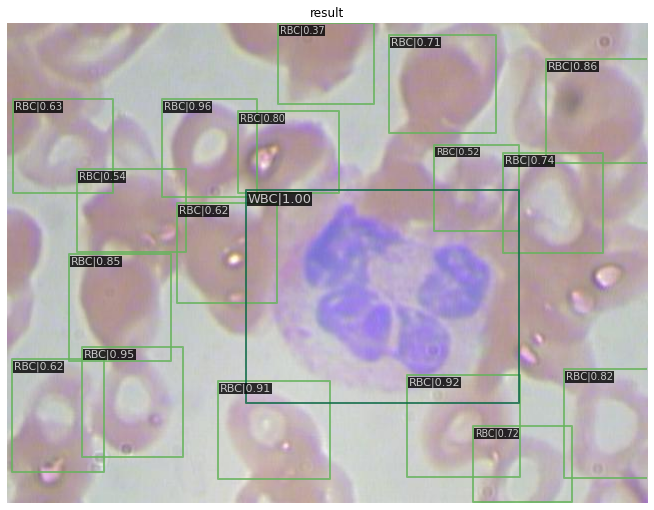

In [ ]:
import cv2
from mmdet.apis import init_detector,inference_detector,show_result_pyplot

img=cv2.imread("/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00000.jpg")

model.cfg=cfg

result=inference_detector(model,img)
show_result_pyplot(model,img,result)

테스트 데이터 세트에 Inference 및 Evaluation 적용하기
- tools/test.py 스크립트는 colab에서 오류 발생

In [ ]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset
from mmcv import Config
from mmdet.apis import set_random_seed

config_file="/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py"
checkpoints_file="/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth"

@DATASETS.register_module(force=True)
class BCCDDataset(CocoDataset):
  CLASSES=('WBC', 'RBC', 'Platelets') 

cfg=Config.fromfile(config_file)

cfg.model.roi_head.bbox_head.num_classes=3

cfg.dataset_type = 'BCCDDataset'
cfg.data_root = '/content/BCCD_Dataset/BCCD/'

cfg.data.train.type='BCCDDataset'
cfg.data.train.data_root='/content/BCCD_Dataset/BCCD/'
cfg.data.train.ann_file='train.json',
cfg.data.train.img_prefix='JPEGImages'

cfg.data.val.type='BCCDDataset'
cfg.data.val.data_root='/content/BCCD_Dataset/BCCD/'
cfg.data.val.ann_file='val.json',
cfg.data.val.img_prefix='JPEGImages'

cfg.data.test.type='BCCDDataset'
cfg.data.test.data_root='/content/BCCD_Dataset/BCCD/'
cfg.data.test.ann_file='test.json',
cfg.data.test.img_prefix='JPEGImages'

cfg.evaluation.interval=12
# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric='bbox'

cfg.optimizer.lr=0.02/8


cfg.lr_configpolicy='step'
cfg.lr_configwarmup=None

cfg.load_from = "/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth"

cfg.work_dir="./tutorial_exps"

cfg.log_config.interval = 10

cfg.checkpoint_config.interval = 12

# bug(?)로 인해 test용 dataset evaluation 시 1로 설정. data loader에서 GPU갯수별 Batch size 임
cfg.data.samples_per_gpu = 1

cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

In [ ]:
cfg.dump('/content/tutorial_exps/bccd_faster_rcnn_conf.py')

In [ ]:
!mkdir -p /content/show_test_output

In [ ]:
# tools/test.py 는 colab에서 제대로 동작하지 않음. 
%cd /content/mmdetection
!python tools/test.py /content/tutorial_exps/bccd_faster_rcnn_conf.py /content/tutorial_exps/epoch_12.pth \
--eval 'bbox' \
--show-dir /content/show_test_output

/content/mmdetection
/usr/local/lib/python3.7/dist-packages/mmdet-2.25.0-py3.7.egg/mmdet/utils/setup_env.py:39: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/usr/local/lib/python3.7/dist-packages/mmdet-2.25.0-py3.7.egg/mmdet/utils/setup_env.py:49: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
Traceback (most recent call last):
  File "tools/test.py", line 275, in <module>
    main()
  File "tools/test.py", line 217, in main
    dataset = build_dataset(cfg.data.test)
  File "/usr/local/lib/python3.7/dist-pa

테스트용 dataset와 dataloader를 별도로 설정하고 trained된 checkpoint 모델을 로딩하여 test 수행.

In [ ]:
from mmdet.datasets import (build_dataloader,build_dataset,replace_ImageToTensor)

# test용 Dataset과 DataLoader 생성. 
# build_dataset()호출 시 list로 감싸지 않는 것이 train용 dataset 생성시와 차이. 
dataset=build_dataset(cfg.data.test)
# pytorch의 경우 data_loader가 별도로 있다
data_loader=build_dataloader(
    dataset,
    # 반드시 아래 samples_per_gpu 인자값은 1로 설정
    samples_per_gpu=cfg.data.samples_per_gpu,
    workers_per_gpu=cfg.data.workers_per_gpu,
    dist=False,
    shuffle=False
)
# 반드시 아래 코드에서 'img' 키값이 tensor로 출력되어야 함. 
next(iter(data_loader))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


{'img': [tensor([[[[0.9474, 0.9474, 0.9474,  ..., 0.0000, 0.0000, 0.0000],
            [0.9474, 0.9474, 0.9474,  ..., 0.0000, 0.0000, 0.0000],
            [0.9646, 0.9646, 0.9646,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000],
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000],
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[1.2031, 1.2031, 1.2031,  ..., 0.0000, 0.0000, 0.0000],
            [1.2031, 1.2031, 1.2031,  ..., 0.0000, 0.0000, 0.0000],
            [1.2206, 1.2206, 1.2206,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [1.5007, 1.5007, 1.5007,  ..., 0.0000, 0.0000, 0.0000],
            [1.5007, 1.5007, 1.5007,  ..., 0.0000, 0.0000, 0.0000],
            [1.5007, 1.5007, 1.5007,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[1.3851, 1.3851, 1.3851,  ..., 0.0000, 0.0000, 0.0000],
            [1.3851, 1.3851, 1.3851,  ..., 0.0000, 0.0000, 0.0000],

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

checkpoints_file="/content/tutorial_exps/epoch_5.pth"

model_ckpt=init_detector(cfg,checkpoints_file,device="cuda:0")

load checkpoint from local path: /content/tutorial_exps/epoch_5.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: backbone.layer3.6.conv1.weight, backbone.layer3.6.bn1.weight, backbone.layer3.6.bn1.bias, backbone.layer3.6.bn1.running_mean, backbone.layer3.6.bn1.running_var, backbone.layer3.6.bn1.num_batches_tracked, backbone.layer3.6.conv2.weight, backbone.layer3.6.bn2.weight, backbone.layer3.6.bn2.bias, backbone.layer3.6.bn2.running_mean, backbone.layer3.6.bn2.running_var, backbone.layer3.6.bn2.num_batches_tracked, backbone.layer3.6.conv3.weight, backbone.layer3.6.bn3.weight, backbone.layer3.6.bn3.bias, backbone.layer3.6.bn3.running_mean, backbone.layer3.6.bn3.running_var, backbone.layer3.6.bn3.num_batches_tracked, backbone.layer3.7.conv1.weight, backbone.layer3.7.bn1.weight, backbone.layer3.7.bn1.bias, backbone.layer3.7.bn1.running_mean, backbone.layer3.7.bn1.running_var, backbone.layer3.7.bn1.num_batches_tracked, backbone.layer3.7.conv2.w

In [ ]:
from mmdet.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# 
model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])
# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함. 
outputs = single_gpu_test(model_ckpt, data_loader, True, '/content/show_test_output', 0.3)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 72/72, 4.1 task/s, elapsed: 18s, ETA:     0s

In [ ]:
print(outputs)

[[array([[1.64612980e+01, 2.97415009e+02, 1.35612656e+02, 3.99544647e+02,
        9.33938622e-01],
       [5.35466003e+02, 3.69700867e+02, 6.40000000e+02, 4.75549072e+02,
        8.90620053e-01],
       [4.93483307e+02, 3.00208191e+02, 6.02337158e+02, 4.03106598e+02,
        8.89108717e-01],
       [4.94817810e+02, 1.63047363e+02, 6.16244019e+02, 2.97204132e+02,
        8.68737042e-01],
       [1.68133743e+02, 2.70341461e+02, 2.69958954e+02, 3.88030518e+02,
        8.45909834e-01],
       [3.26489227e+02, 3.05408478e+02, 4.71340942e+02, 4.34564545e+02,
        8.38984311e-01],
       [5.16130432e+02, 4.35078888e+01, 6.33678345e+02, 1.56253876e+02,
        8.27130437e-01],
       [2.53864117e+01, 1.40021576e+02, 1.34205811e+02, 2.31170380e+02,
        7.76968777e-01],
       [3.99234131e+02, 1.68761948e+02, 4.96167267e+02, 2.80958649e+02,
        7.40864515e-01],
       [8.40171051e+01, 6.42530594e+01, 1.94075058e+02, 1.72099365e+02,
        5.92212915e-01],
       [1.75051620e+02, 4.51

반환된 test용 데이터세트의 inference 적용 결과 확인 및 성능 evaluation 수행.

In [ ]:
metric = dataset.evaluate(outputs, metric='bbox')
print(metric)


Evaluateing /content/BCCD_Dataset/BCCD/test.json with 72 images now

Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.53s).
Accumulating evaluation results...
DONE (t=0.06s).

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.601
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.914
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.686
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.459
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.492
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.453
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   a